In [1]:
import numpy as np
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import time

import src.Laplacians as Laplacians
import src.Eigens as Eigens
import src.utils.make_m as Makem

/Users/andrew/.pyenv/versions/3.12.0/envs/pyprojects312/lib/python3.12/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1272: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


Error for N=1: Cannot use scipy.linalg.eig for sparse A with k >= N - 1. Use scipy.linalg.eig(A.toarray()) or reduce k.
Error for N=2: Cannot use scipy.linalg.eig for sparse A with k >= N - 1. Use scipy.linalg.eig(A.toarray()) or reduce k.
Computation times saved for N=1 to 30.


/Users/andrew/.pyenv/versions/3.12.0/envs/pyprojects312/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/andrew/.pyenv/versions/3.12.0/envs/pyprojects312/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


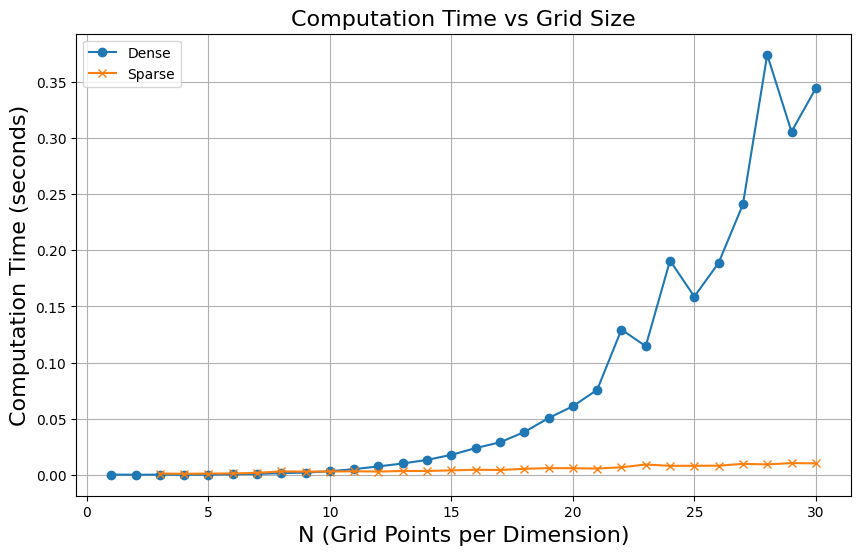

In [2]:
# Initialize results dictionary
results = {"dense": {i: [] for i in range(1, 31)}, "sparse": {i: [] for i in range(1, 31)}}

L = 30  # Side length or diameter
N = 30  # Number of grid points per dimension
h = L / (N - 1)  # Grid spacing

# Loop over N from 1 to 30
for N in range(1, 31):
    h = L / (N - 1) if N > 1 else L  # Avoid division by zero for N=1
    try:
        # Generate Laplacian matrix
        M = Laplacians.laplacian(L, N, h)

        # Dense computation
        start_time = time.time()
        eigenvalues_dense, eigenvectors_dense = scipy.linalg.eigh(M.toarray())
        dense_time = time.time() - start_time
        results["dense"][N].append(dense_time)

        # Sparse computation
        start_time = time.time()
        eigenvalues_sparse, eigenvectors_sparse = scipy.sparse.linalg.eigs(M, k=6, sigma=0)
        sparse_time = time.time() - start_time
        results["sparse"][N].append(sparse_time)

    except Exception as e:
        print(f"Error for N={N}: {e}")
        results["dense"][N].append(None)
        results["sparse"][N].append(None)

# Save results
print("Computation times saved for N=1 to 30.")

Ns = np.arange(1,31, 1)
# Remove None elements from results
for key in results:
    for n in results[key]:
        results[key][n] = [x for x in results[key][n] if x is not None]
plt.figure(figsize=(10, 6))
plt.plot(Ns, [np.mean(results["dense"][i]) for i in Ns], label="Dense", marker='o')
plt.plot(Ns, [np.mean(results["sparse"][i]) for i in Ns], label="Sparse", marker='x')
plt.xlabel("N (Grid Points per Dimension)", fontsize=16)
plt.ylabel("Computation Time (seconds)", fontsize=16)
plt.title("Computation Time vs Grid Size", fontsize=16)
plt.legend()
plt.grid(True)
plt.savefig("figs/sparse_vs_dense", dpi =200)
plt.show()

In [ ]:
# Initialize results dictionary
results = {"dense": {i: [] for i in range(1, 101)}, "sparse": {i: [] for i in range(1, 101)}}

N = 100
# Loop over N from 1 to 30
for L in range(1, 100):
    h = L / (N - 1) if N > 1 else L  # Avoid division by zero for N=1
    try:
        # Generate Laplacian matrix
        M = Laplacians.laplacian(L, N, h)

        # Dense computation
        start_time = time.time()
        eigenvalues_dense, eigenvectors_dense = scipy.linalg.eigh(M.toarray())
        dense_time = time.time() - start_time
        results["dense"][L].append(dense_time)

        # Sparse computation
        start_time = time.time()
        eigenvalues_sparse, eigenvectors_sparse = scipy.sparse.linalg.eigs(M, k=6, sigma=0)
        sparse_time = time.time() - start_time
        results["sparse"][L].append(sparse_time)

    except Exception as e:
        print(f"Error for N={N}: {e}")
        results["dense"][L].append(None)
        results["sparse"][L].append(None)

# Save results
print("Computation times saved for L=1 to 30.")

Ls = np.arange(1,101, 1)
# Remove None elements from results
for key in results:
    for n in results[key]:
        results[key][n] = [x for x in results[key][n] if x is not None]
plt.figure(figsize=(10, 6))
plt.plot(Ls, [np.mean(results["dense"][i]) for i in Ls], label="Dense", marker='o')
plt.plot(Ls, [np.mean(results["sparse"][i]) for i in Ls], label="Sparse", marker='x')
plt.xlabel("L diameter Length", fontsize=12)
plt.ylabel("Computation Time (seconds)", fontsize=12)
plt.title("Computation Time vs Object Diameter Length", fontsize=14)
plt.legend()
plt.grid(True)

In [ ]:
# Parameters
L = 1.0  # Side length or diameter
N = 40  # Number of grid points per dimension

# Solve for each shape
Eigens.solve_eigenvalue_problem("square", L, N)
Eigens.solve_eigenvalue_problem("rectangle", L, N)
Eigens.solve_eigenvalue_problem("circle", L, N)

In [ ]:
# Parameters
L = 4  # Side length or diameter
N = 40   # Number of grid points per dimension

# Plot Laplacian and grid structure for a 4x4 grid
Laplacians.plot_laplacian(N)

# Plot original objects
Laplacians.plot_original_object("square", L, N)
Laplacians.plot_original_object("rectangle", L, N)
Laplacians.plot_original_object("circle", L, N)

In [ ]:
# Spectrum of Eigenfrequencies

M = 25
N = 20
Ls = np.array(range(1,M))
results_sq = []
results_rec = []
results_circ = []
for L in Ls:
    eigenfrequencies_sq, eigenmodus_sq = Eigens.solve_eigenvalue_problem("square", L, N*L, plot=False)
    eigenfrequencies_rec, eigenmodus_rec = Eigens.solve_eigenvalue_problem("rectangle", L, N*L, plot=False)
    eigenfrequencies_circ, eigenmodus_circ = Eigens.solve_eigenvalue_problem("circle", L, N*L, plot=False)

    results_sq.append(eigenfrequencies_sq)
    results_rec.append(eigenfrequencies_rec)
    results_circ.append(eigenfrequencies_circ)
    print("Done with", L)

In [ ]:
xs_sq = []
xs_rec = []
xs_circ = []

for i,res in enumerate(results_sq):
    x = np.full(len(res),Ls[i])
    xs_sq.append(x)

for i,res in enumerate(results_rec):
    x = np.full(len(res),Ls[i])
    xs_rec.append(x)

for i,res in enumerate(results_circ):
    x = np.full(len(res),Ls[i])
    xs_circ.append(x)    

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Square subplot
axes[0, 0].scatter(xs_sq, results_sq, s=20, color='green', label='Square', alpha=1, edgecolor = 'black')
axes[0, 0].set_ylabel("Eigenfrequencies", fontsize=20)
axes[0, 0].legend()

# Rectangle subplot
axes[0, 1].scatter(xs_rec, results_rec, s=20, color='red', label='Rectangle', alpha=1, edgecolor = 'black')
axes[0, 1].set_ylabel("Eigenfrequencies", fontsize=20)
axes[0, 1].legend()

# Circle subplot
axes[1, 0].scatter(xs_circ, results_circ, s=20, color='blue', label='Circle', alpha=1, edgecolor = 'black')
axes[1, 0].set_xlabel("Size L", fontsize=20)
axes[1, 0].set_ylabel("Eigenfrequencies", fontsize=20)
axes[1, 0].legend()

# Combined plot
axes[1, 1].scatter(xs_sq, results_sq, s=20, color='green', label='Square', alpha=0.5, edgecolor = 'black')
axes[1, 1].scatter(xs_rec, results_rec, s=20, color='red', label='Rectangle', alpha=0.5, edgecolor = 'black')
axes[1, 1].scatter(xs_circ, results_circ, s=20, color='blue', label='Circle', alpha=0.5, edgecolor = 'black')
axes[1, 1].set_xlabel("Size L", fontsize=20)
axes[1, 1].set_ylabel("Eigenfrequencies", fontsize=20)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Steady-State 

# Solve the system
L = 2
N = 100  # Grid resolution (higher for better accuracy)
num_points = N * N

M = Makem.Make_m(L, N)
b = np.zeros(num_points)

# Identify the source point (closest to (0.6, 1.2))
source_x, source_y = (round(N/2 + 0.6/2*N/2), round(N/2 + 1.2/2*N/2))
source_idx = source_y * N + source_x  # Convert (x, y) to 1D index
b[source_idx] = 1  # Set source condition

# Modify M to enforce Dirichlet condition at the source
M = M.tocsc()
M = M.copy()
M[source_idx, :] = 0
M[source_idx, source_idx] = 1

# Solve for concentration
c = scipy.sparse.linalg.spsolve(M, b)

# Convert to grid
C = c.reshape((N, N))  # Use (N, N) instead of (n, n)

# Plot result
x_vals = np.linspace(-2, 2, N)
y_vals = np.linspace(-2, 2, N)
X, Y = np.meshgrid(x_vals, y_vals)

plt.figure(figsize=(6, 5))
plt.contourf(X, Y, C, levels=20, cmap='viridis')
plt.colorbar(label='Concentration')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.show()

In [ ]:
# Parameters
L = 1.0
n = 20  # Grid size

### First for the square ###
shape = 'square'
# Solve for eigenvalues and eigenvectors
print(f"Computing eigenmodes for {shape} with L={L}")
frequencies, eigenvectors, grid_shape, reshape_func, points = Laplacians.solve_eigenmodes(shape, n)

# Print the eigenfrequencies
print("\nEigenfrequencies (resonance frequencies):")
for i, freq in enumerate(frequencies[:6]):
    print(f"Mode {i+1}: λ = {freq:.6f}")

# Plot the first few eigenmodes
Laplacians.plot_eigenmodes(shape, frequencies, eigenvectors, grid_shape, reshape_func, points)

# Create time evolution animation for the first eigenmode
anim, fig = Laplacians.create_time_animation(
    shape, frequencies[0], eigenvectors[:, 0], 
    grid_shape, reshape_func, points
)

# Save the animation
anim.save('gifs/eigenmode_animation.gif', writer='pillow', fps=10)

### Second the circle ###
shape = 'circle'
print(f"\nComputing eigenmodes for {shape} with L={L}")
frequencies, eigenvectors, grid_shape, reshape_func, points = Laplacians.solve_eigenmodes(shape, n)

anim, fig = Laplacians.create_time_animation(
    shape, frequencies[0], eigenvectors[:, 0], 
    grid_shape, reshape_func, points
)
Laplacians.plot_eigenmodes(shape, frequencies, eigenvectors, grid_shape, reshape_func, points)
anim.save('gifs/circle_eigenmode_animation.gif', writer='pillow', fps=10)